In [1]:
#!/usr/bin/env python3
# -*- coding:utf-8 -*-
u"""
Created at 2019.04.12
"""
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd
from collections.abc import Iterable
from itertools import chain
import numpy as np
from tqdm import tqdm


class BasicBar(object):
    u"""
    负责做单个的百分比柱子
    """

    def __init__(
            self,
            ax,
            values,
            label="",
            ylabel="",
            colors=None,
            no_x_axis=True,
            boxplot=False,
            height=1,
            font_size=15
    ):
        u"""
        初始化该类
        :param ax: matplotlib axis
        :param values: a list of int/float or a single float/int
        :param label: the label show in legend
        :param ylabel: the lable shoed in y axis
        :param colors: a list of RGB color or a string represented RGB value
        :param no_x_axis: whether to plot x axis
        :param boxplot: whether to make boxplot rather than bar plot
        :param height: height of single bar, default 1
        :param xlim: single value, set the x axis limitation
        """
        self.values = values

        if colors is not None:
            if isinstance(colors, str):
                colors = [colors]
            elif len(colors) < len(values):
                raise ValueError("Input colors less than values")

        self.colors = {
            "I": "#EC7A21", 
            "II": "#D73F47", 
            "III": "#65A9A3", 
            "IV": "#4A933E", 
            "LUAD_Normal": "#FECC1B", 
            "LUSC_Normal": "#DA6906",
            "LUAD": "#0084D1",
            "Normal": "#73BDFF", 
            "LUSC": "#A0C807", 
            "LELC": "#6A0019", 
            "CPI": "#C5000B",
            "PA01": "#F8766D",
            "PA02": "#F17E4F",
            "PA03": "#E88523",
            "PA04": "#DE8C00",
            "PA05": "#D29300",
            "PA06": "#C49A00",
            "PA07": "#B4A000",
            "PA08": "#A3A500",
            "PA09": "#8EAB00",
            "PA10": "#75AF00",
            "PA11": "#53B400",
            "PA12": "#00B70C",
            "PA13": "#00BB45",
            "PA14": "#00BD64",
            "PA15": "#00BF7D",
            "PA16": "#00C094",
            "PA17": "#00C1A8",
            "PA18": "#00C0BB",
            "PA19": "#00BECD",
            "PA20": "#00BBDD",
            "PA21": "#00B6EB",
            "PA22": "#00B0F6",
            "PA23": "#00A8FF",
            "PS01": "#4B9FFF",
            "PS02": "#8195FF",
            "PS03": "#A58AFF",
            "PS04": "#C17FFF",
            "PS05": "#D774FD",
            "PS06": "#E76BF3",
            "PS07": "#F365E6",
            "PS08": "#FB61D7",
            "PS09": "#FF61C5",
            "PS10": "#FF64B2",
            "PS11": "#FF699D",
            "PS12": "#FD6F86",
        }

        self.no_x_axis = no_x_axis
        self.boxplot = boxplot
        self.ax = ax
        self.label = label
        self.height = height
        self.font_size = font_size

        self.plot()

    def legend(self, *args, **wargs):
        u"""
        wrapper of matplotlib.axis
        """
        self.ax.legend(*args, **wargs)

    def show_x_axis(self):
        u"""
        show x axis
        """
        self.no_x_axis = False
        self.set_border()

    def set_xlim(self, xmin, xmax):
        u"""
        Set x limitation
        :param xmax: int/float
        """
        self.ax.spines['bottom'].set_bounds(xmin, xmax)

        self.ax.set_xlim(xmin, xmax)

    def set_ylabel(self, distance=None):
        u"""
        set ylabel
        :param distance: distance between plot and y label
        """
        self.ax.set_ylabel(
            self.label,
            rotation=0,
            va="center",
            fontsize=self.font_size,
            labelpad=distance
        )

    def set_border(self):
        u"""
        as function name said
        """
        self.ax.spines['top'].set_visible(False)
        self.ax.spines['right'].set_visible(False)
        self.ax.spines['bottom'].set_visible(not self.no_x_axis)
        self.ax.spines['left'].set_visible(False)

        self.ax.tick_params(
            top=False,
            bottom=not self.no_x_axis,
            left=False,
            right=False,
            labelleft=False,
            labelbottom=not self.no_x_axis
        )

    def make_percentage_barplot(self):
        u"""
        make percentage stacked barplot
        """

        idx, curr = 0, 0
        for k, v in self.values.items():
            if self.colors and k in self.colors.keys():
                self.ax.fill_between([curr, curr + v], y1=0, y2=self.height, color=self.colors[k], label=k)
            else:
                self.ax.fill_between([curr, curr + v], y1=0, y2=self.height, label=k)
            idx += 1
            curr += v

    def make_barplot(self):
        u"""
        make barplot
        :return:
        """
        if self.colors:
            self.ax.fill_between([0, self.values], y1=0, y2=self.height, color="#1DAFC3")
        else:
            self.ax.fill_between([0, self.values], y1=0, y2=self.height)

    def make_boxplot(self):
        u"""
        """
        sns.boxplot(x=self.values, ax=self.ax, color="#FC8210")

    def plot(self):
        u"""
        Make plot base on input values
        """
        if self.boxplot:
            self.make_boxplot()
        elif isinstance(self.values, dict):
            self.make_percentage_barplot()
        elif isinstance(self.values, int) or isinstance(self.values, float):
            self.make_barplot()

        self.set_border()


In [2]:

def format_data(data, first="res.0.8", second="cell_name", third="Tissue", boxplot=False):
    u"""
    pandas is kind of tricky
    dict to collect all the values I needs
    first layer is cell_names
    second layer is {cluster id: counts}
    :param data: pandas data
    :param first: str
    :param second: str or None
    :param third: str or None
    :param boxplot: whether to collect data for boxplot
    :return:
    """
    res = {}

    first = data[first].tolist()
    second = data[second].tolist()

    if third is not None:
        third = data[third].tolist()

        for i, j, k in tqdm(zip(first, second, third)):
            temp = res.get(j, {})

            temp2 = temp.get(i, {})

            temp2[k] = temp2.get(k, 0) + 1

            temp[i] = temp2

            res[j] = temp
    else:
        for i, j in tqdm(zip(first, second)):
            temp = res.get(j, {})
            temp[i] = temp.get(i, 0) + 1
            res[j] = temp

    # if third is not None, convert int to percentage
    if third is not None:
        if not boxplot:
            for key, values in tqdm(res.items()):
                temp = {}
                for cluster, val in values.items():
                    temp1 = {}
                    for k, v in val.items():
                        temp1[k] = v / sum(val.values())
                    temp[cluster] = temp1

                res[key] = temp
        else:
            for key, values in tqdm(res.items()):
                for cluster, val in values.items():
                    values[cluster] = [np.log10(x + 1) for x in val.keys()]

    return res


In [29]:

def make_plots(
    gs, 
    data, 
    column=0, 
    boxplot=False, 
    ylabel_dist=None, 
    legend=False, 
    title=None,
    xlabel=None,
    xlim_left=0,
    xlim_right=None,
    legend_anchor=6,
    legend_ncol=2,
    legend_spacing=None,
    handletextpad=None,
    handlelength=None
):
    u"""
    make plots
    :param gs: grid spec
    :param data: list of values
    :param column: which column to put that figures
    :param boxplot: whether plot boxplot
    :param percentage: whether to make percentage plot
    :param ylabel_dist: int -> then show ylabel
    :return: None
    """
    xmax = 0
    axes = []
    curr = 0
    
    keys = sorted(data.keys())
    
    for key in keys:
        values = data[key]
        temp_keys = sorted(values.keys())

        for k in temp_keys:
            v = values[k]

            if isinstance(v, dict):
                xmax = max(xmax, max(v.values()))
            elif isinstance(v, list):
                xmax = max(xmax, max(v))
            else:
                xmax = max(xmax, v)

            ax = plt.subplot(gs[curr, column])

            ax = BasicBar(
                ax=ax,
                values=v,
                no_x_axis=True,
                boxplot=boxplot,
                label=k
            )

            axes.append(ax)

            curr += 1

        curr += 1
        
    axes[-1].ax.tick_params(axis='both', labelsize=15)
    axes[-1].show_x_axis()
    
    if title:
        axes[0].ax.set_title(title, fontdict={"fontsize": 20})
    
    if legend:
        axes[0].legend(
            loc = "upper center", 
            bbox_to_anchor=(0.5, legend_anchor), 
            ncol=legend_ncol, 
            fontsize = 12, 
            labelspacing=legend_spacing,
            columnspacing=legend_spacing,
            handletextpad =handletextpad,
            handlelength=handlelength
        )
        
    if xlabel:
        axes[-1].ax.set_xlabel(xlabel, fontdict={"fontsize": 20})

    for i in axes:
        if xlim_right:
            i.set_xlim(xlim_left, xlim_right)
        else:
            i.set_xlim(xlim_left, xmax)

        if ylabel_dist is not None:
            if xlim_right:
                xmax = xlim_right
            i.set_ylabel(xmax * ylabel_dist)

    return axes

In [4]:
data = pd.read_csv("../../02_rds/meta.csv",index_col=0)

# data.loc[data["cell_name"] == "Exhaust T", "cell_name"] = "CD8+"

data.shape

# data.head()

/home/zhangyiming/.local/share/virtualenvs/scanpy-UGAxTWFP/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (11,12,13,14,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(293432, 20)

In [5]:
data = data.loc[data["Batch"] != 3, ]
data.shape

(220716, 20)

220716it [00:00, 728349.74it/s]
100%|██████████| 17/17 [00:00<00:00, 18419.83it/s]
220716it [00:00, 803870.39it/s]
100%|██████████| 17/17 [00:00<00:00, 18157.16it/s]
220716it [00:00, 1102671.43it/s]
220716it [00:00, 795869.65it/s]
100%|██████████| 17/17 [00:00<00:00, 83.58it/s]


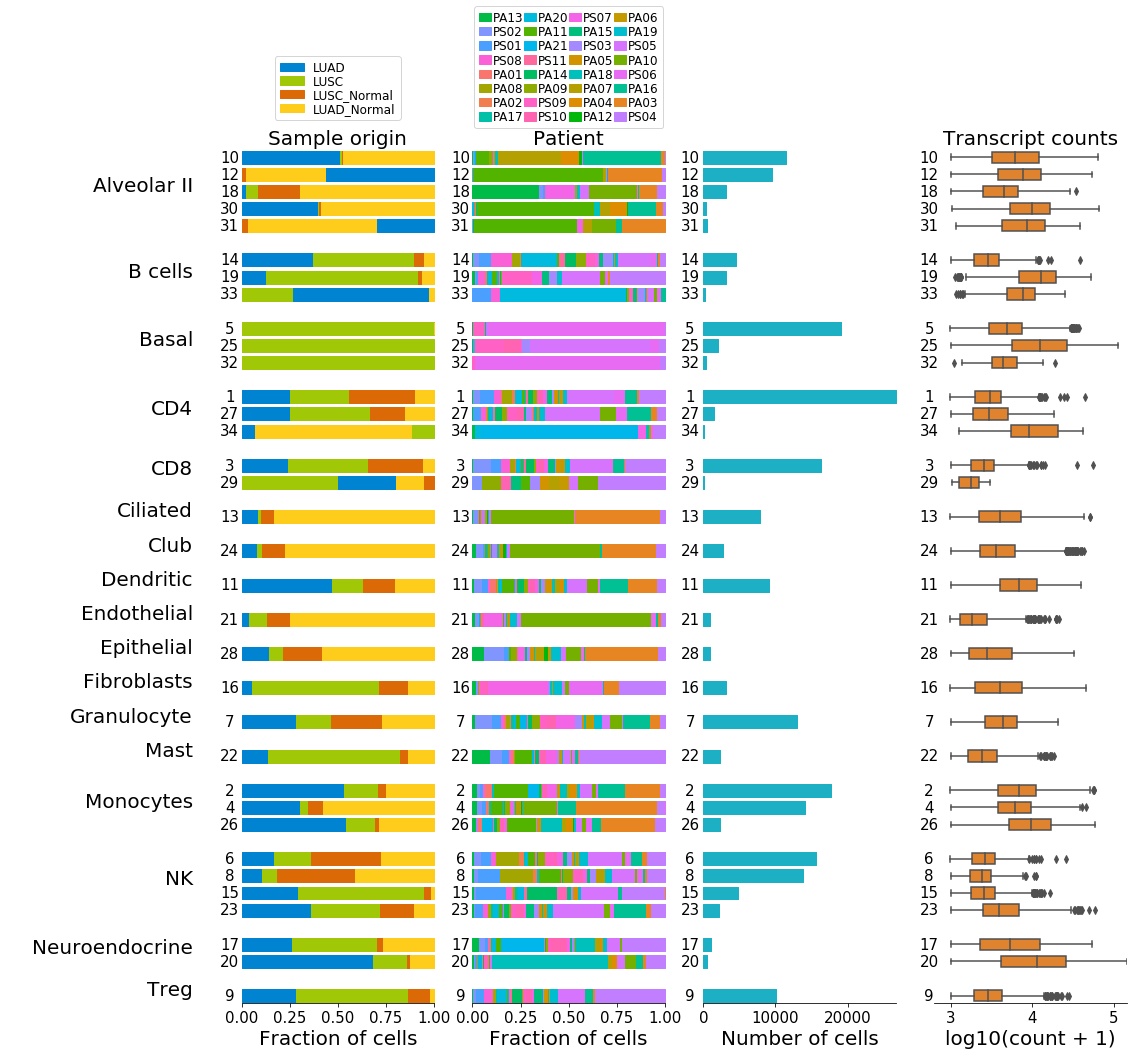

In [32]:
#%% prepare data

plt.figure(1, figsize=(20, 16))

gs = gridspec.GridSpec(len(data["res.0.8"].unique()) + len(data["cell_name"].unique()), 5)


temp = format_data(data, first = "res.0.8", second = "cell_name", third = "Disease")

# make cell names
curr = 0
for key in sorted(temp.keys()):
    value = temp[key]
    ax = plt.subplot(gs[curr:curr + len(value), 0])
    ax.text(
        0.9, 
        0.5, 
        key, 
        fontsize=20,
        horizontalalignment='right'
    )
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(
        top=False,
        bottom=False,
        left=False,
        right=False,
        labelleft=False,
        labelbottom=False
    )
    ax.set_xlim(0, 0.95)
    
    curr += len(value) + 1
    
# make disease type
make_plots(
    gs, 
    data=temp, 
    column=1, 
    ylabel_dist=12,
    legend = True, 
    xlabel="Fraction of cells", 
    title = "Sample origin",
    xlim_right=1, 
    legend_spacing=0.05,
    legend_ncol = 1, 
    legend_anchor=8
)

# make patients
temp = format_data(data, first = "res.0.8", second = "cell_name", third = "PatientID")
make_plots(
    gs, 
    data=temp, 
    column=2, 
    ylabel_dist=12, 
    xlabel="Fraction of cells", 
    title = "Patient", 
    xlim_right=1, 
    legend = True, 
    legend_spacing=0.1, 
    handletextpad=0.1,
    legend_ncol=4, 
    legend_anchor=11.5,
    handlelength=1
)

# make number of cells
temp = format_data(data, first = "res.0.8", second = "cell_name", third=None)
make_plots(
    gs, 
    data=temp, 
    column=3,  
    ylabel_dist=0.0005, 
    xlabel="Number of cells", 
    title = "", 
    xlim_right=None
)

# make 
temp = format_data(data, first = "res.0.8", second = "cell_name", third="nUMI", boxplot=True)
make_plots(
    gs, 
    data=temp, 
    column=4, 
    boxplot = True, 
    ylabel_dist=1,
    xlabel="log10(count + 1)", 
    title = "Transcript counts", 
    xlim_left=2.8, 
    xlim_right=None
)

# plt.show()
plt.savefig("../../01_first_plots/combination_plots_all.pdf", bbox_inches='tight')

62521it [00:00, 875615.91it/s]
100%|██████████| 7/7 [00:00<00:00, 20676.15it/s]
62521it [00:00, 895063.35it/s]
100%|██████████| 7/7 [00:00<00:00, 15982.65it/s]
62521it [00:00, 710850.61it/s]
62521it [00:00, 711631.89it/s]
100%|██████████| 7/7 [00:00<00:00, 110.43it/s]


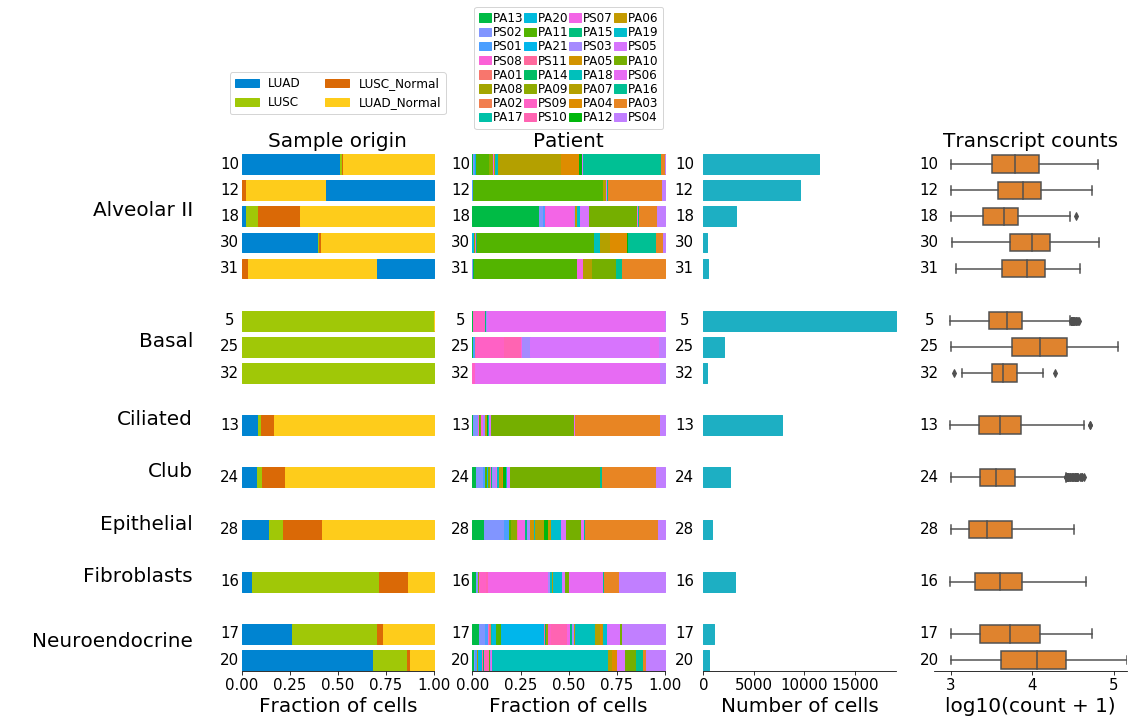

In [35]:
#%% prepare data
immu_cells = [
    "B cells",
    "CD4",
    "CD8",
    "Dendritic",
    "Exhaust T",
    "Endothelial",
    "Erythroid precursor",
    "Granulocyte",
    "Mast",
    "Monocytes",
    "NK",
    "T_cells",
    "Treg"
]


non_immu = data.loc[~data["cell_name"].isin(immu_cells), : ]

plt.figure(1, figsize=(20, 10))

gs = gridspec.GridSpec(len(non_immu["res.0.8"].unique()) + len(non_immu["cell_name"].unique()), 5)


temp = format_data(non_immu, first = "res.0.8", second = "cell_name", third = "Disease")

# make cell names
curr = 0
for key in sorted(temp.keys()):
    value = temp[key]
    ax = plt.subplot(gs[curr:curr + len(value), 0])
    ax.text(
        0.9, 
        0.5, 
        key, 
        fontsize=20,
        horizontalalignment='right'
    )
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(
        top=False,
        bottom=False,
        left=False,
        right=False,
        labelleft=False,
        labelbottom=False
    )
    ax.set_xlim(0, 0.95)
    
    curr += len(value) + 1
    
# make disease type
make_plots(
    gs, 
    data=temp, 
    column=1, 
    ylabel_dist=12, 
    legend = True, 
    legend_anchor=5, 
    xlabel="Fraction of cells", 
    title = "Sample origin", 
    xlim_right=1
)

# make patients
temp = format_data(non_immu, first = "res.0.8", second = "cell_name", third = "PatientID")
make_plots(
    gs, 
    data=temp, 
    column=2, 
    ylabel_dist=12, 
    xlabel="Fraction of cells", 
    title = "Patient",
    xlim_right=1,
    legend = True,
    legend_spacing=0.1, 
    handletextpad=0.1,
    legend_ncol=4, 
    legend_anchor=8,
    handlelength=1
)

# make number of cells
temp = format_data(non_immu, first = "res.0.8", second = "cell_name", third=None)
make_plots(
    gs, 
    data=temp, 
    column=3,  
    ylabel_dist=0.001, 
    xlabel="Number of cells", 
    title = "", 
    xlim_right=None
)

# make 
temp = format_data(non_immu, first = "res.0.8", second = "cell_name", third="nUMI", boxplot=True)
make_plots(
    gs,
    data=temp, 
    column=4, 
    boxplot = True, 
    ylabel_dist=1,
    xlabel="log10(count + 1)", 
    title = "Transcript counts", 
    xlim_left=2.8, 
    xlim_right=None
)

# plt.show()
plt.savefig("../../01_first_plots/combination_plots_non_immu.pdf", bbox_inches='tight')

158195it [00:00, 831174.04it/s]
100%|██████████| 10/10 [00:00<00:00, 26214.40it/s]
158195it [00:00, 889502.18it/s]
100%|██████████| 10/10 [00:00<00:00, 12713.86it/s]
158195it [00:00, 1041788.03it/s]
158195it [00:00, 456844.62it/s]
100%|██████████| 10/10 [00:00<00:00, 87.31it/s]


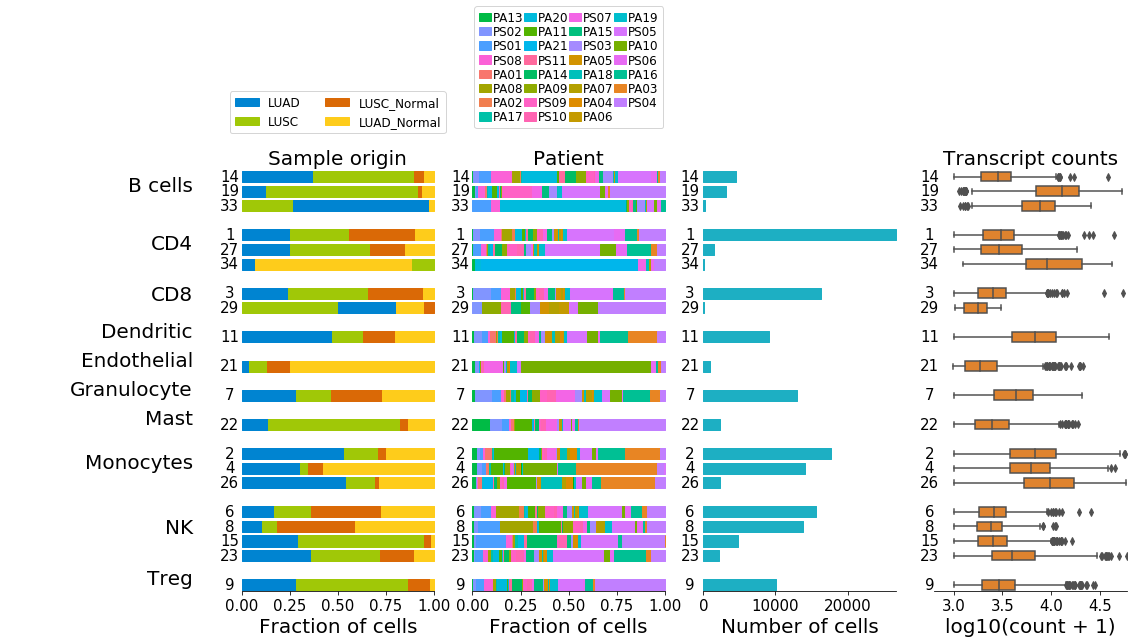

In [39]:
#%% prepare data

immu = data.loc[data["cell_name"].isin(immu_cells), : ]

plt.figure(1, figsize=(20, 8))

gs = gridspec.GridSpec(len(immu["res.0.8"].unique()) + len(immu["cell_name"].unique()), 5)


temp = format_data(immu, first = "res.0.8", second = "cell_name", third = "Disease")

# make cell names
curr = 0
for key in sorted(temp.keys()):
    value = temp[key]
    ax = plt.subplot(gs[curr:curr + len(value), 0])
    ax.text(
        0.9, 
        0.5, 
        key, 
        fontsize=20,
        horizontalalignment='right'
    )
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(
        top=False,
        bottom=False,
        left=False,
        right=False,
        labelleft=False,
        labelbottom=False
    )
    ax.set_xlim(0, 0.95)
    
    curr += len(value) + 1
    
# make disease type
make_plots(
    gs, 
    data=temp, 
    column=1, 
    ylabel_dist=12, 
    legend = True, 
    legend_anchor=8, 
    xlabel="Fraction of cells", 
    title = "Sample origin", 
    xlim_right=1
)

# make patients
temp = format_data(immu, first = "res.0.8", second = "cell_name", third = "PatientID")
make_plots(
    gs, 
    data=temp, 
    column=2, 
    ylabel_dist=12, 
    xlabel="Fraction of cells", 
    title = "Patient", 
    xlim_right=1,
    legend = True,
    legend_spacing=0.1, 
    handletextpad=0.1,
    legend_ncol=4, 
    legend_anchor=15,
    handlelength=1
)

# make number of cells
temp = format_data(immu, first = "res.0.8", second = "cell_name", third=None)
make_plots(
    gs, 
    data=temp, 
    column=3,  
    ylabel_dist=0.0005, 
    xlabel="Number of cells", 
    title = "", 
    xlim_right=None
)

# make 
temp = format_data(immu, first = "res.0.8", second = "cell_name", third="nUMI", boxplot=True)
make_plots(
    gs, 
    data=temp, 
    column=4, 
    boxplot = True, 
    ylabel_dist=1, 
    xlabel="log10(count + 1)", 
    title = "Transcript counts",
    xlim_left=2.8, 
    xlim_right=None
)


# plt.show()
plt.savefig("../../01_first_plots/combination_plots_immu.pdf", bbox_inches='tight')